## Heart Disease Prediction Using Supervised Machine Learning 

In [136]:
# Lets import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [137]:
# Lets read the dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [138]:
# Lets see what the columns are
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Each of these columns represent a medical aspect of the patient.

- age: Age of the patient (usually in years).
- sex: Gender of the patient (often coded as 0 for female and 1 for male).
- cp: Chest pain type (typically categorized into types such as typical angina, atypical angina, non-anginal pain, and asymptomatic).
- trestbps: Resting blood pressure (measured in mm Hg).
- chol: Serum cholesterol level (measured in mg/dl).
- fbs: Fasting blood sugar (1 if > 120 mg/dl, 0 otherwise).
- restecg: Resting electrocardiographic results (values typically indicating normal, having ST-T wave abnormality, or showing probable or definite left ventricular hypertrophy).
- thalach: Maximum heart rate achieved.
- exang: Exercise induced angina (1 if yes, 0 if no).
- oldpeak: ST depression induced by exercise relative to rest (measured in mm).
- slope: Slope of the peak exercise ST segment (typically categorized as upsloping, flat, or downsloping).
- ca: Number of major vessels (0-3) colored by fluoroscopy.
- thal: Thalassemia (typically categorized as normal, fixed defect, or reversible defect).
- target: Diagnosis of heart disease (usually coded as 0 for no heart disease and 1 for heart disease)

In [139]:
# Lets see the shape of the dataset
df.shape

(1025, 14)

In [140]:
# Lets see the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


The dataset is pretty clean. No null values can be observed.

### 1. Data Preprocessing and Cleaning

In [141]:
# Seperating the numeric and non numeric columns
num_cols = []
cat_cols = []
for i in df.columns:

    if df[i].dtype == 'object':
        cat_cols.append(i)

    elif df[i].dtype == 'int64' or df[i].dtype == 'float64':
        num_cols.append(i)

    else:
        pass

print(num_cols)
print(cat_cols)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
[]


In [142]:
# no cat cols in the dataset

del cat_cols

In [143]:
# Dataset description
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [144]:
# Lets check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [145]:
# Lets check for duplicate values
df.duplicated().sum()

723

In [146]:
# the data seems to have some duplicates
# Lets analyze them

df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [147]:
# Sort the DataFrame by all columns
sorted_df = df.sort_values(by=df.columns.tolist())

# Display the sorted DataFrame
print("Sorted DataFrame with Duplicates Together:")
print(sorted_df)

# Check for duplicates
duplicates = sorted_df[sorted_df.duplicated(keep=False)]
print("\nDuplicates:")
duplicates.head()

Sorted DataFrame with Duplicates Together:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
60    29    1   1       130   204    0        0      202      0      0.0   
64    29    1   1       130   204    0        0      202      0      0.0   
118   29    1   1       130   204    0        0      202      0      0.0   
668   29    1   1       130   204    0        0      202      0      0.0   
12    34    0   1       118   210    0        1      192      0      0.7   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
535   76    0   2       140   197    0        2      116      0      1.1   
965   76    0   2       140   197    0        2      116      0      1.1   
160   77    1   0       125   304    0        0      162      1      0.0   
162   77    1   0       125   304    0        0      162      1      0.0   
387   77    1   0       125   304    0        0      162      1      0.0   

     slope  ca  thal  target  
60       2   

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


In [148]:
print(f'percentage of duplicate rows: {100*(df.duplicated().sum()/df.shape[0]):.2f}%')

percentage of duplicate rows: 70.54%


The data contains a lot of duplicated rows, it means this data may be specifically created for training an ML model by copying original records again and again across the dataset. Which could be a problem as the model may be overfitting.

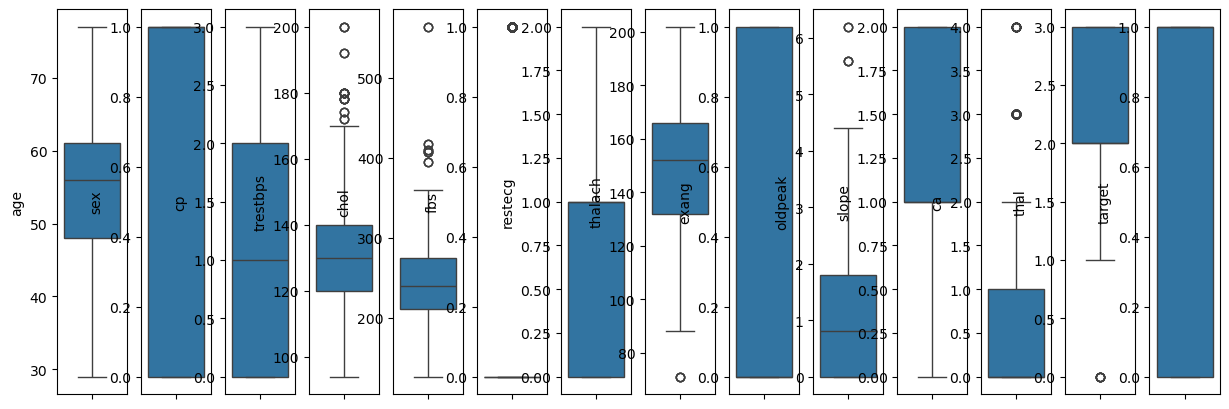

In [149]:
# Lets analyze the outliers 

plt.figure(figsize=(15,5))
for i,col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(df[col])

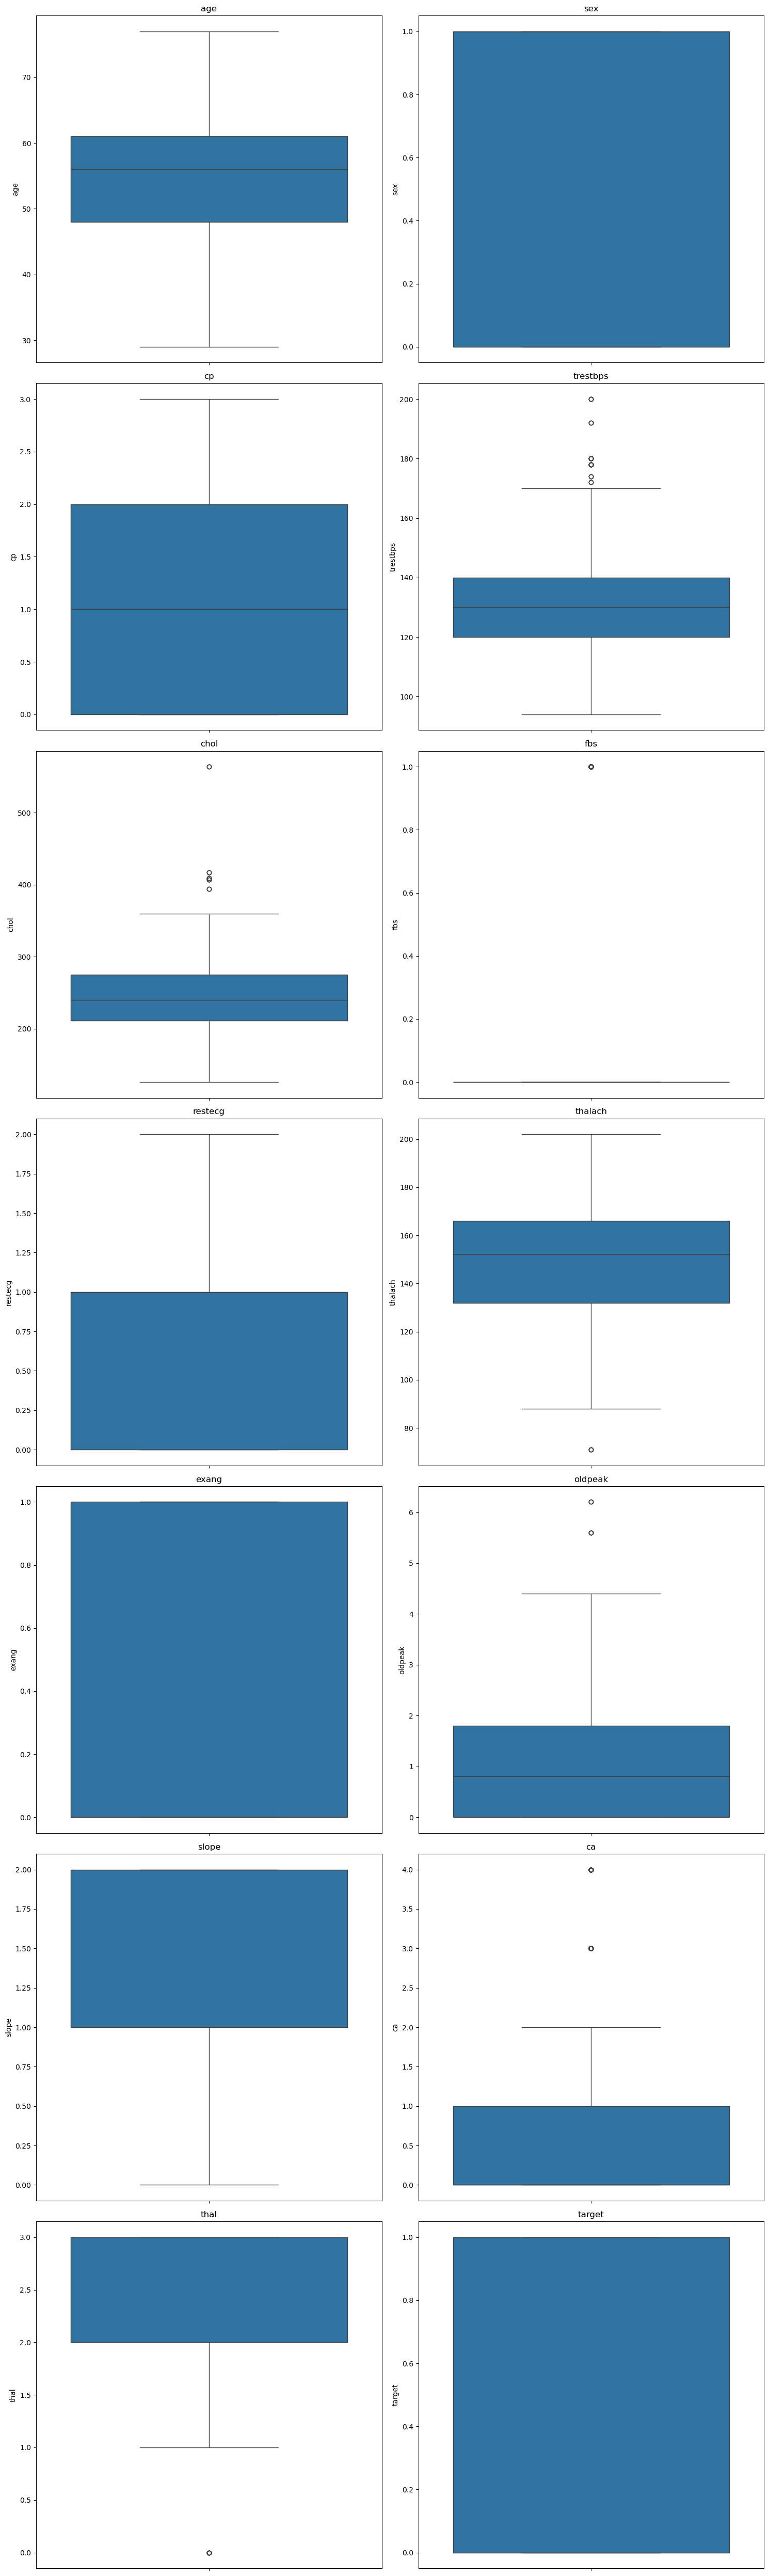

In [150]:
plt.figure(figsize=(15, 50))

# Loop through numerical columns and create box plots
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 2 + len(num_cols) % 2, 2, i + 1)  # 2 columns per row
    sns.boxplot(y=df[col])  # Use 'y' parameter to plot vertically
    plt.title(col)  # Title for each subplot

# Adjust layout
plt.tight_layout()

plt.show()

Above plots recognize some values as outliers but we need to focus only on real outliers. We can apply domain knowledge for that.

- trestbps is the resting blood pressure it can go as high as 200 mm Hg which is a cause of concern just as any value over 180 mm Hg.

- chol (cholestrol) levels similarly can go as high as 600 which is extreme and denote a serious medical problem, but again it can reach 600 mg/dL.

- fbs is fasting blood sugar, in this datset it is represented by a 0 if it is less than 120 gm/dL and 1 if it is higher than 120. A lot of people have it 0.

- thalach or heart rate under stress should be high and it being lower than 100 bpm represents a critical heart problem but it is not an outlier. 

- oldpeak which represents the ST depression induced by exercise relative to rest can be between 0 and 6.

- ca or major artries blocked can be between 0 and 3, as we have 3 major coronory artries in the heart and any value higher than 3 requires to be investigated.

- thal represents the thalesemia status of the patient, can be between 1 (normal) to 3 (most abnormal), cannot be 0. 

In [151]:
# we have 1 abnormality in ca and 1 in thal

# lets print the number of abnormality in ca and thal
print('Abmormal point in ca:')
df[df['ca'] > 3]

Abmormal point in ca:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
242,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
340,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
417,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [152]:
# lets print the number of abnormality in ca and thal
print('Abmormal point in thal:')
df[df['thal'] < 1]

Abmormal point in thal:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
319,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
329,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
686,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
734,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
893,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [153]:
# Lets drop the abnormality in ca and thal
# Keep only rows where 'ca' is less than 3 and 'thal' is greater than 0

df = df[(df['ca'] < 4) & (df['thal'] > 0)]

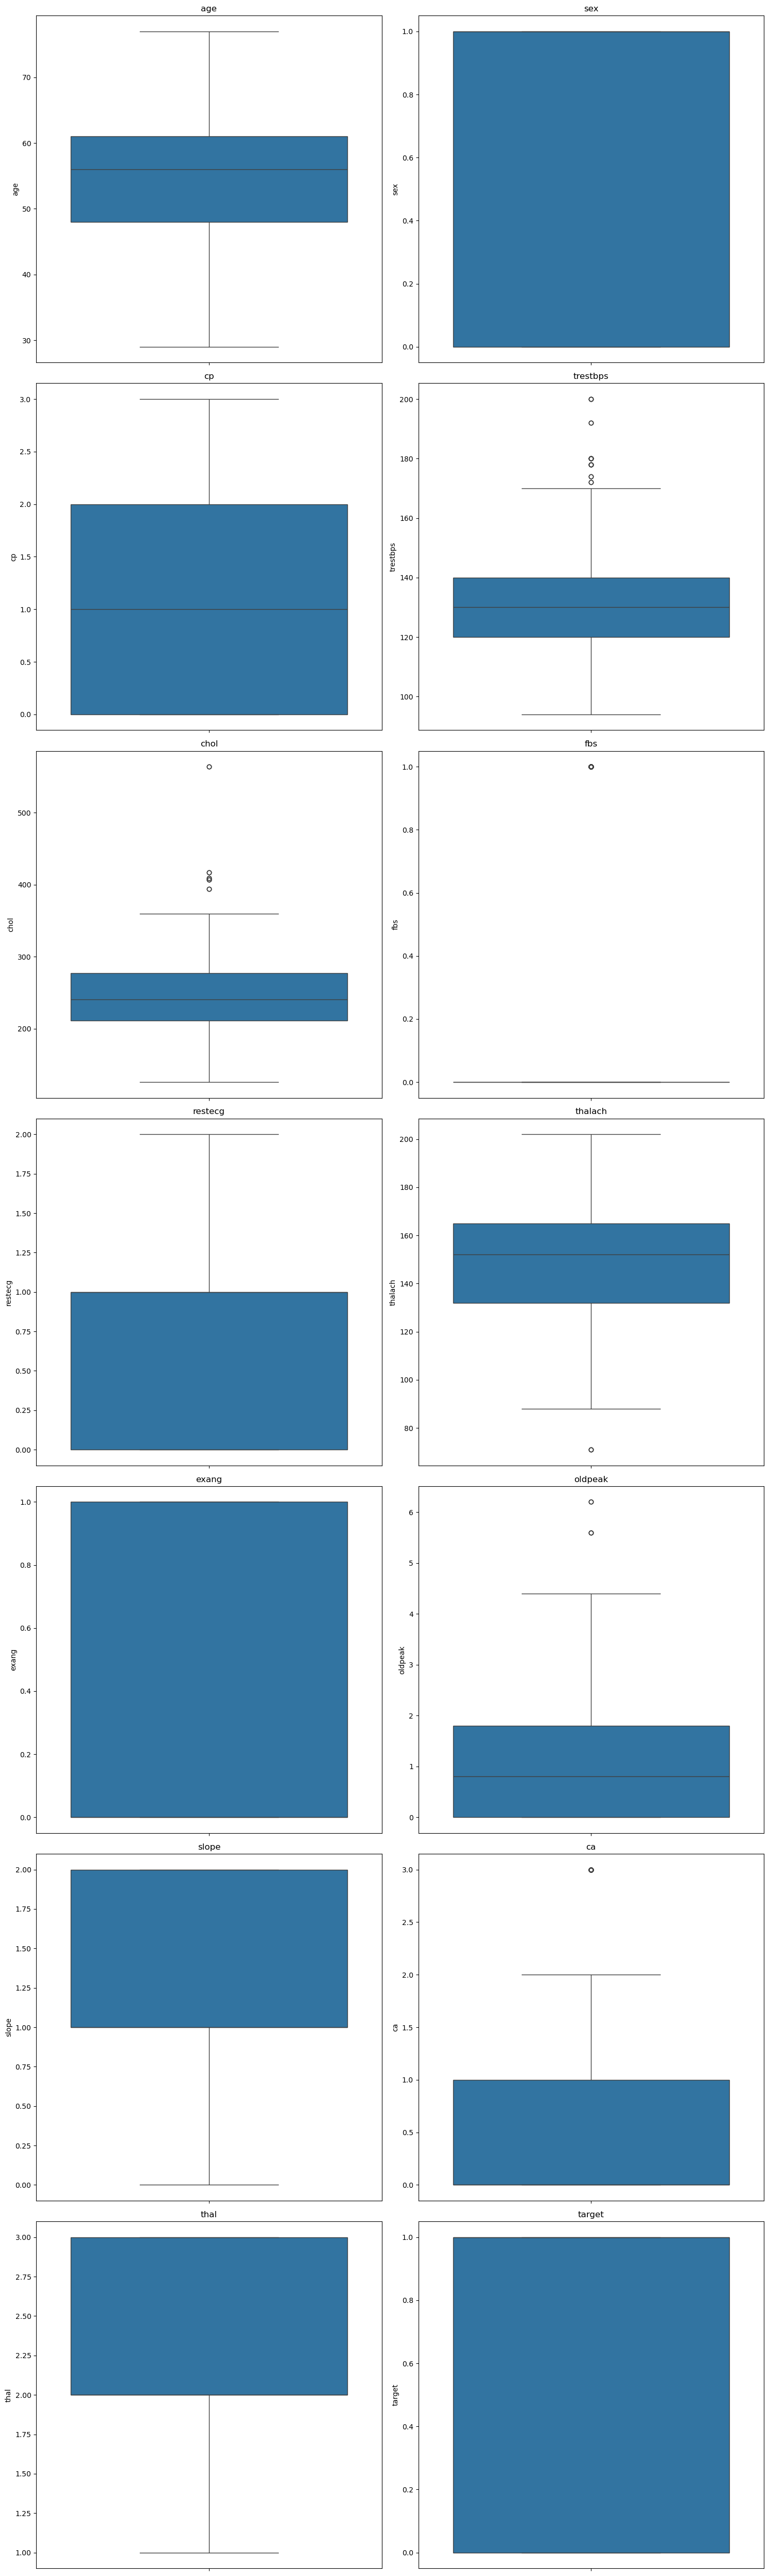

In [154]:
plt.figure(figsize=(15, 50))

# Loop through numerical columns and create box plots
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 2 + len(num_cols) % 2, 2, i + 1)  # 2 columns per row
    sns.boxplot(y=df[col])  # Use 'y' parameter to plot vertically
    plt.title(col)  # Title for each subplot

# Adjust layout
plt.tight_layout()

plt.show()

The data abnormalities seems to be fixed


In [155]:
# Lets see the correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094017,-0.062035,0.281774,0.204699,0.131792,-0.127133,-0.385332,0.087253,0.196117,-0.159610,0.365137,0.065341,-0.226825
sex,-0.094017,1.000000,-0.040696,-0.081780,-0.192823,0.019085,-0.069942,-0.063794,0.139273,0.091967,-0.025398,0.081613,0.203336,-0.285822
cp,-0.062035,-0.040696,1.000000,0.034560,-0.071551,0.103347,0.037757,0.306562,-0.390883,-0.167036,0.116042,-0.227693,-0.167702,0.423833
trestbps,0.281774,-0.081780,0.034560,1.000000,0.132143,0.188513,-0.127277,-0.044567,0.064345,0.191291,-0.126402,0.105693,0.061044,-0.143221
chol,0.204699,-0.192823,-0.071551,0.132143,1.000000,0.028859,-0.136328,-0.011586,0.061830,0.051636,-0.003669,0.129070,0.082655,-0.089647
fbs,0.131792,0.019085,0.103347,0.188513,0.028859,1.000000,-0.104493,-0.007812,0.021864,0.011542,-0.048572,0.157921,-0.021449,-0.017946
restecg,-0.127133,-0.069942,0.037757,-0.127277,-0.136328,-0.104493,1.000000,0.034114,-0.060437,-0.044912,0.083531,-0.122861,-0.014781,0.127930
thalach,-0.385332,-0.063794,0.306562,-0.044567,-0.011586,-0.007812,0.034114,1.000000,-0.384681,-0.350771,0.395745,-0.266230,-0.109439,0.426872
exang,0.087253,0.139273,-0.390883,0.064345,0.061830,0.021864,-0.060437,-0.384681,1.000000,0.309848,-0.258572,0.145665,0.218821,-0.425839
oldpeak,0.196117,0.091967,-0.167036,0.191291,0.051636,0.011542,-0.044912,-0.350771,0.309848,1.000000,-0.575127,0.296165,0.204037,-0.435157


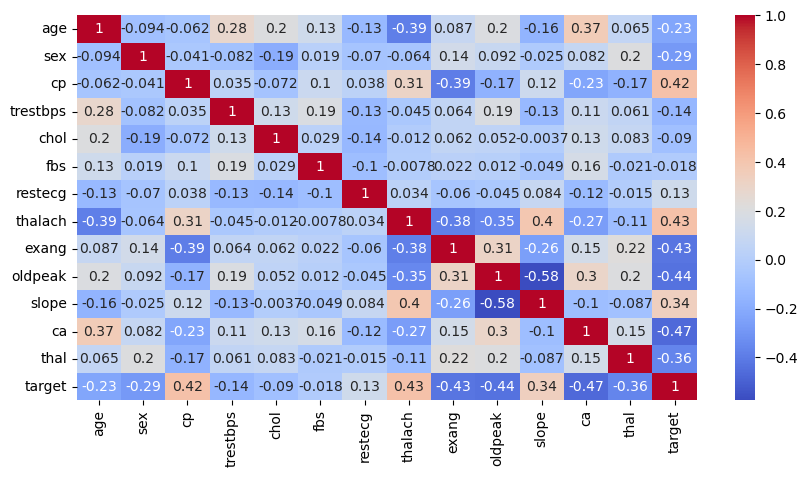

In [156]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [198]:
# splitting the data

X = []
y = 'target'
for i in df.columns:
    if i != y:
        X.append(i)


features = df[X]
std_scaler = StandardScaler()
features = std_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=X)


X_train, X_val, y_train, y_val = train_test_split(features, df[y], test_size=0.5, random_state=42)


### Prediction Using Random Forest Classifier

In [181]:
# Model building

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [160]:
# Lets check the accuracy score
print(f'{accuracy_score(y_val, y_pred)} is the accuracy score')

1.0 is the accuracy score


In [165]:
new_data = {
    'age': 40,          # Younger age
    'sex': 0,          # Female (if 0 represents female)
    'cp': 1,           # Atypical angina (generally less concerning)
    'trestbps': 110,   # Lower resting blood pressure
    'chol': 180,       # Normal cholesterol level
    'fbs': 0,          # Fasting blood sugar <= 120 mg/dl
    'restecg': 0,      # Normal electrocardiographic results
    'thalach': 170,    # High maximum heart rate
    'exang': 0,        # No exercise induced angina
    'oldpeak': 0.0,    # No ST depression
    'slope': 1,        # Flat slope (not concerning)
    'ca': 0,           # No major vessels colored
    'thal': 3          # Normal thalassemia status
}

new_data = pd.DataFrame(new_data, index=[0])
new_data = std_scaler.transform(new_data)
new_data = pd.DataFrame(new_data, columns=X)

y_pred = model.predict(new_data)
print(f'Prediction: {y_pred[0]}')

Prediction: 1


In [171]:
new_data_1 = {
    'age': 38,          # Younger age
    'sex': 1,          # Male
    'cp': 0,           # No chest pain
    'trestbps': 120,   # Normal resting blood pressure
    'chol': 170,       # Normal cholesterol level
    'fbs': 0,          # Fasting blood sugar <= 120 mg/dl
    'restecg': 0,      # Normal electrocardiographic results
    'thalach': 160,    # High maximum heart rate
    'exang': 0,        # No exercise induced angina
    'oldpeak': 0.0,    # No ST depression
    'slope': 2,        # Upsloping slope
    'ca': 0,           # No major vessels colored
    'thal': 3          # Normal thalassemia status
}

new_data_1 = pd.DataFrame(new_data_1, index=[0])
new_data_1 = std_scaler.transform(new_data_1)
new_data_1 = pd.DataFrame(new_data_1, columns=X)

y_pred = model.predict(new_data_1)
print(f'Prediction: {y_pred[0]}')

Prediction: 0


In [210]:
new_data_2 = {
    'age': 45,          # Middle-aged
    'sex': 0,          # Female
    'cp': 1,           # Atypical angina
    'trestbps': 115,   # Lower resting blood pressure
    'chol': 175,       # Normal cholesterol level
    'fbs': 0,          # Fasting blood sugar <= 120 mg/dl
    'restecg': 0,      # Normal electrocardiographic results
    'thalach': 165,    # Good maximum heart rate
    'exang': 0,        # No exercise induced angina
    'oldpeak': 0.1,    # Minimal ST depression
    'slope': 1,        # Flat slope
    'ca': 0,           # No major vessels colored
    'thal': 2          # Normal thalassemia status
}

new_data_2 = pd.DataFrame(new_data_2, index=[0])
new_data_2 = std_scaler.transform(new_data_2)
new_data_2 = pd.DataFrame(new_data_2, columns=X)

y_pred_probs = model.predict_proba(new_data_2)
print(f'Predicted probabilities: {y_pred_probs}')
y_pred = model.predict(new_data_2)
print(f'Prediction: {y_pred[0]}')

Predicted probabilities: [[0.01577031 0.98422969]]
Prediction: 1


In [178]:
new_data_3 = {
    'age': 50,          # Middle-aged
    'sex': 1,          # Male
    'cp': 0,           # No chest pain
    'trestbps': 125,   # Normal resting blood pressure
    'chol': 190,       # Normal cholesterol level
    'fbs': 0,          # Fasting blood sugar <= 120 mg/dl
    'restecg': 0,      # Normal electrocardiographic results
    'thalach': 150,    # Good maximum heart rate
    'exang': 0,        # No exercise induced angina
    'oldpeak': 0.0,    # No ST depression
    'slope': 1,        # Flat slope
    'ca': 0,           # No major vessels colored
    'thal': 3          # Normal thalassemia status
}

new_data_3 = pd.DataFrame(new_data_3, index=[0])
new_data_3 = std_scaler.transform(new_data_3)
new_data_3 = pd.DataFrame(new_data_3, columns=X)

y_pred = model.predict(new_data_3)
print(f'Prediction: {y_pred[0]}')

Prediction: 0


In [207]:
new_data_4 = {
    'age': 33,          # Younger age
    'sex': 0,          # Female
    'cp': 1,           # Atypical angina
    'trestbps': 105,   # Lower resting blood pressure
    'chol': 160,       # Normal cholesterol level
    'fbs': 0,          # Fasting blood sugar <= 120 mg/dl
    'restecg': 0,      # Normal electrocardiographic results
    'thalach': 175,    # High maximum heart rate
    'exang': 0,        # No exercise induced angina
    'oldpeak': 0.0,    # No ST depression
    'slope': 2,        # Upsloping slope
    'ca': 0,           # No major vessels colored
    'thal': 3          # Normal thalassemia status
}

new_data_4 = pd.DataFrame(new_data_4, index=[0])
new_data_4 = std_scaler.transform(new_data_4)
new_data_4 = pd.DataFrame(new_data_4, columns=X)

y_pred = model.predict(new_data_4)
print(f'Prediction: {y_pred[0]}')

Predicted probabilities: [[0.72777421 0.27222579]]


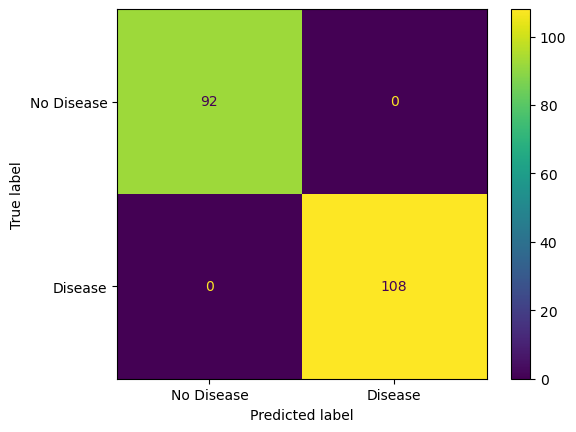

In [182]:
# import confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease']).plot()

### Prediction using Logistic Regression

In [199]:
# Model building
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [200]:
# Lets see the models accuracy

acc = accuracy_score(y_val, y_pred)
print('Accuracy of model', acc)

Accuracy of model 0.862


#### Lets try the model again for some new records

In [201]:
new_data_1 = {
    'age': 38,          # Younger age
    'sex': 1,          # Male
    'cp': 0,           # No chest pain
    'trestbps': 120,   # Normal resting blood pressure
    'chol': 170,       # Normal cholesterol level
    'fbs': 0,          # Fasting blood sugar <= 120 mg/dl
    'restecg': 0,      # Normal electrocardiographic results
    'thalach': 160,    # High maximum heart rate
    'exang': 0,        # No exercise induced angina
    'oldpeak': 0.0,    # No ST depression
    'slope': 2,        # Upsloping slope
    'ca': 0,           # No major vessels colored
    'thal': 3          # Normal thalassemia status
}

new_data_1 = pd.DataFrame(new_data_1, index=[0])
new_data_1 = std_scaler.transform(new_data_1)
new_data_1 = pd.DataFrame(new_data_1, columns=X)

y_pred = model.predict(new_data_1)
print(f'Prediction: {y_pred[0]}')

Prediction: 1


In [193]:
new_data_2 = {
    'age': 45,          # Middle-aged
    'sex': 0,          # Female
    'cp': 1,           # Atypical angina
    'trestbps': 115,   # Lower resting blood pressure
    'chol': 175,       # Normal cholesterol level
    'fbs': 0,          # Fasting blood sugar <= 120 mg/dl
    'restecg': 0,      # Normal electrocardiographic results
    'thalach': 165,    # Good maximum heart rate
    'exang': 0,        # No exercise induced angina
    'oldpeak': 0.1,    # Minimal ST depression
    'slope': 1,        # Flat slope
    'ca': 0,           # No major vessels colored
    'thal': 2          # Normal thalassemia status
}

new_data_2 = pd.DataFrame(new_data_2, index=[0])
new_data_2 = std_scaler.transform(new_data_2)
new_data_2 = pd.DataFrame(new_data_2, columns=X)

y_pred = model.predict(new_data_2)
print(f'Prediction: {y_pred[0]}')

Prediction: 1


In [206]:
new_data_2 = {
    'age': 45,          # Middle-aged
    'sex': 0,          # Female
    'cp': 1,           # Atypical angina
    'trestbps': 115,   # Lower resting blood pressure
    'chol': 450,       # High cholesterol level
    'fbs': 0,          # Fasting blood sugar <= 120 mg/dl
    'restecg': 0,      # Normal electrocardiographic results
    'thalach': 175,    # Good maximum heart rate
    'exang': 0,        # No exercise induced angina
    'oldpeak': 1,    # Minimal ST depression
    'slope': 1,        # Flat slope
    'ca': 2,           # 2 vessels colored
    'thal': 2          # Normal thalassemia status
}

new_data_2 = pd.DataFrame(new_data_2, index=[0])
new_data_2 = std_scaler.transform(new_data_2)
new_data_2 = pd.DataFrame(new_data_2, columns=X)

y_pred = model.predict(new_data_2)
print(f'Prediction: {y_pred[0]}')

Prediction: 0


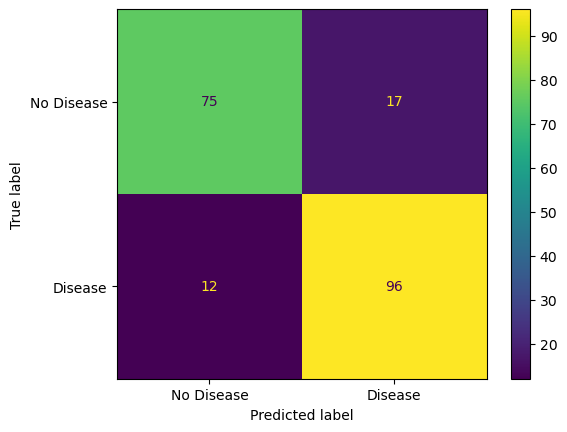

In [191]:
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease']).plot()